In [7]:
import requests

url = 'https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json'
filename = 'sarcasm.json'

response = requests.get(url)

with open(filename, 'wb') as f:
    f.write(response.content)
    

In [24]:
import json

with open('./sarcasm.json', 'r') as f:
    dataset = json.load(f)
    
sentences = []
labels = []

for item in dataset:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    

In [25]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [26]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(training_sentences)
word_index= tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(training_sentences)
padded_train = pad_sequences(train_sequences, padding= 'post', truncating='post', maxlen=120)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)
padded_test = pad_sequences(test_sequences, padding= 'post', truncating='post', maxlen=120)

In [27]:
train_labels = np.array(training_labels)
test_labels = np.array(testing_labels)

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam'
              )

model.summary()

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(padded_train, train_labels,
          epochs=10,
          validation_data = (padded_test, test_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6640 - loss: 0.5668 - val_accuracy: 0.8445 - val_loss: 0.3548
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9113 - loss: 0.2282 - val_accuracy: 0.8490 - val_loss: 0.3608
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9655 - loss: 0.1078 - val_accuracy: 0.8392 - val_loss: 0.4293
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9860 - loss: 0.0521 - val_accuracy: 0.8386 - val_loss: 0.5582
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9960 - loss: 0.0184 - val_accuracy: 0.8308 - val_loss: 0.7182
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.8334 - val_loss: 0.8117
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.8325 - val_loss: 0.8389
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.

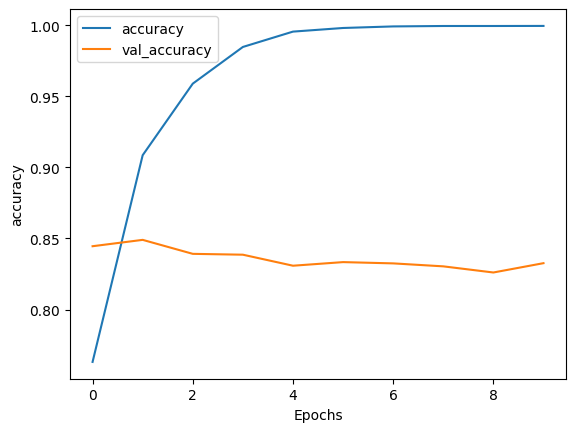

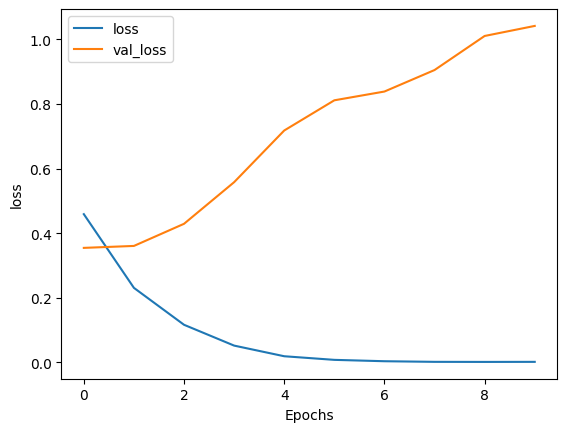

In [34]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')